In [ ]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math
import nltk


import os

Improting the data. From data.head(-50) we can see number of inputs. There are total 3100 feedbacks. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set()
data_path = "/content/drive/MyDrive/amazon_alexa.tsv"
data = pd.read_csv(data_path, sep='\t')
data.head(-50)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3095,5,30-Jul-18,Black Dot,"Does what I expected, and more.",1
3096,1,30-Jul-18,White Dot,The product sounded the same as the emoji spea...,0
3097,5,30-Jul-18,Black Dot,I have a friend now.,1
3098,5,30-Jul-18,White Dot,It’s easier to do things with it,1


In [ ]:
data.isnull()
#to see any NaN is the dataset

,rating,date,variation,verified_reviews,feedback
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3145,False,False,False,False,False
3146,False,False,False,False,False
3147,False,False,False,False,False
3148,False,False,False,False,False


In [ ]:
data.isnull().values.any()
#to see of there are is any missing value

False

#Basic Exploratory Data Analysis


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
data.sample(n=15)

,rating,date,variation,verified_reviews,feedback
1901,5,27-Jul-18,Black Plus,The echo plus is very straight forward and eas...,1
956,5,29-Jul-18,Charcoal Fabric,I already have an Alexa and with Amazon find t...,1
221,4,29-Jul-18,Charcoal Fabric,"Good quality, great sound quality",1
3025,5,30-Jul-18,Black Dot,"Listens well, does way more than expected, lov...",1
2474,5,30-Jul-18,White Dot,I love it!!,1
1961,5,25-Jul-18,Black Plus,It has great sound and very responsive to comm...,1
2044,5,14-Jul-18,Black Plus,"Love, Love, Love my Amazon Echo Plus!!❤️❤️",1
282,5,29-Jul-18,Charcoal Fabric,Nice product A+,1
1334,5,20-Jul-18,Black Spot,What a wonderful little Alexa enabled gadget a...,1
2414,1,30-Jul-18,Configuration: Fire TV Stick,I would love this remote if i wasnt spending s...,0


In [ ]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
data.groupby('feedback').describe()

rating                                             
           count      mean       std  min  25%  50%  75%  max
feedback                                                     
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0

In [ ]:
data.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [ ]:
data.groupby('variation').describe()

rating                      ... feedback          
                              count      mean       std  ...      50%  75%  max
variation                                                ...                   
Black                         261.0  4.233716  1.339838  ...      1.0  1.0  1.0
Black  Dot                    516.0  4.453488  1.027660  ...      1.0  1.0  1.0
Black  Plus                   270.0  4.370370  1.158391  ...      1.0  1.0  1.0
Black  Show                   265.0  4.490566  0.996635  ...      1.0  1.0  1.0
Black  Spot                   241.0  4.311203  1.247764  ...      1.0  1.0  1.0
Charcoal Fabric               430.0  4.730233  0.683994  ...      1.0  1.0  1.0
Configuration: Fire TV Stick  350.0  4.591429  0.990751  ...      1.0  1.0  1.0
Heather Gray Fabric           157.0  4.694268  0.647108  ...      1.0  1.0  1.0
Oak Finish                     14.0  4.857143  0.363137  ...      1.0  1.0  1.0
Sandstone Fabric               90.0  4.355556  0.997875  ...      1.0  1.0  1.0
Walnut Finish                   9.0  4.888889  0.333333  ...      1.0  1.0  1.0
White                          91.0  4.142857  1.464934  ...      1.0  1.0  1.0
White  Dot                    184.0  4.423913  1.047857  ...      1.0  1.0  1.0
White  Plus                    78.0  4.358974  1.184032  ...      1.0  1.0  1.0
White  Show                    85.0  4.282353  1.278129  ...      1.0  1.0  1.0
White  Spot                   109.0  4.311927  1.222454  ...      1.0  1.0  1.0

[16 rows x 16 columns]

# Rearraging data set based by rating


In [ ]:
rate_1 = data[data['rating']==1]
rate_2 = data[data['rating']==2]
rate_3 = data[data['rating']==3]
rate_4 = data[data['rating']==4]
rate_5 = data[data['rating']==5]
data_rate = pd.concat([rate_1, rate_2, rate_3 , rate_4 , rate_5])
data_rate.head()

,rating,date,variation,verified_reviews,feedback
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0
350,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0
361,1,29-Jul-18,Black,This thing barely works. You have to select 3r...,0


# Variation and rating count plot

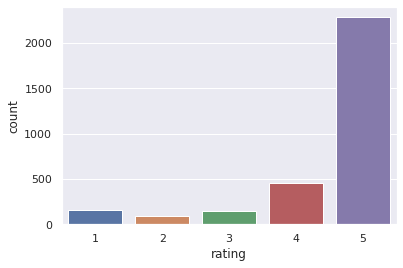

In [ ]:
ax = sns.countplot(x="rating", data=data_rate)
#rating count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

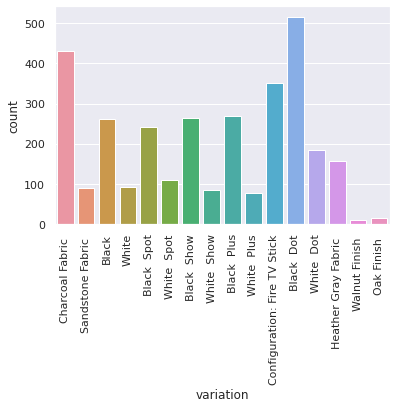

In [ ]:
ax = sns.countplot(x="variation", data=data_rate)
plt.xticks(Rotation = 90)
# Please rotate the axis here

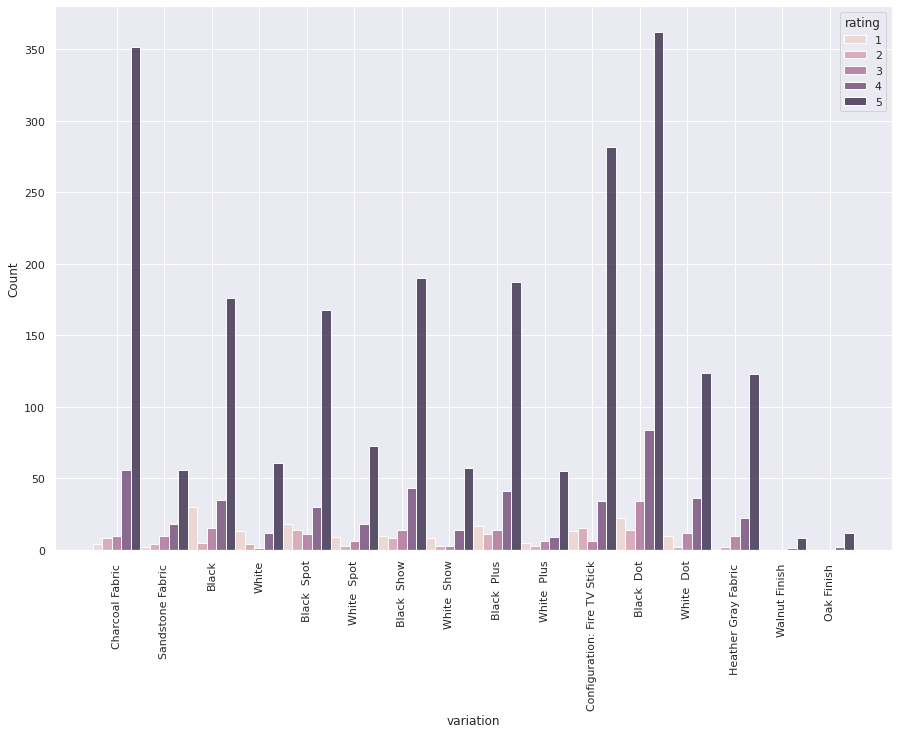

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data =data_rate, x = 'variation', hue ='rating', multiple="dodge", shrink = 1)
plt.xticks(Rotation = 90)
plt.show()

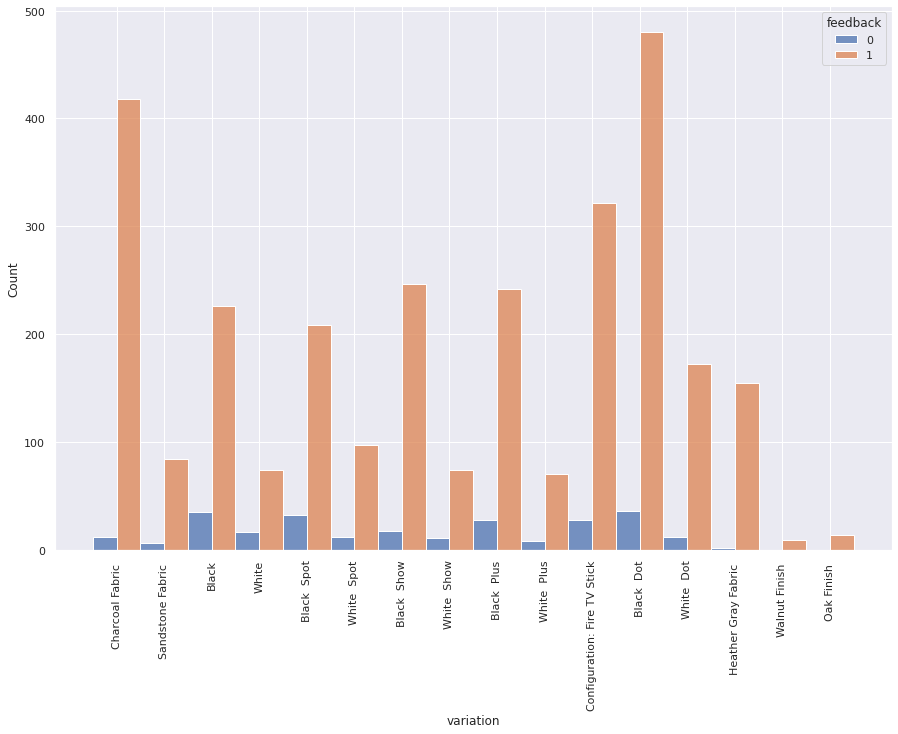

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(ax=ax,data =data_rate, x = 'variation', hue ='feedback',multiple="dodge", shrink = 1)
plt.xticks(Rotation = 90)
plt.show()

#Review Length analysis

In [ ]:
data_rate['len'] = data_rate['verified_reviews'].apply(len)
data_rate.head()

,rating,date,variation,verified_reviews,feedback,len
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0,22
350,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0,109
361,1,29-Jul-18,Black,This thing barely works. You have to select 3r...,0,154


In [ ]:
data_rate.len.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: len, dtype: float64

In [ ]:
data_rate.groupby('len').describe()

rating                                ... feedback                    
      count      mean       std  min  25%  ...      min  25%  50%  75%  max
len                                        ...                             
1      81.0  3.716049  1.575076  1.0  3.0  ...      0.0  1.0  1.0  1.0  1.0
2       4.0  5.000000  0.000000  5.0  5.0  ...      1.0  1.0  1.0  1.0  1.0
3       3.0  4.000000  1.732051  2.0  3.5  ...      0.0  0.5  1.0  1.0  1.0
4      15.0  4.600000  0.828079  2.0  4.5  ...      0.0  1.0  1.0  1.0  1.0
5      17.0  4.823529  0.392953  4.0  5.0  ...      1.0  1.0  1.0  1.0  1.0
...     ...       ...       ...  ...  ...  ...      ...  ...  ...  ...  ...
1686    1.0  2.000000       NaN  2.0  2.0  ...      0.0  0.0  0.0  0.0  0.0
1833    1.0  3.000000       NaN  3.0  3.0  ...      1.0  1.0  1.0  1.0  1.0
1954    1.0  3.000000       NaN  3.0  3.0  ...      1.0  1.0  1.0  1.0  1.0
2393    1.0  5.000000       NaN  5.0  5.0  ...      1.0  1.0  1.0  1.0  1.0
2851    1.0  5.000000       NaN  5.0  5.0  ...      1.0  1.0  1.0  1.0  1.0

[490 rows x 16 columns]

In [ ]:
data_rate.groupby('rating').describe()

feedback                      ...  len                              
          count mean  std  min  25%  ...  min    25%    50%     75%     max
rating                               ...                                   
1         161.0  0.0  0.0  0.0  0.0  ...  1.0  36.00  120.0  284.00  1124.0
2          96.0  0.0  0.0  0.0  0.0  ...  1.0  78.75  163.0  309.25  1686.0
3         152.0  1.0  0.0  1.0  1.0  ...  1.0  54.00  130.0  284.00  1954.0
4         455.0  1.0  0.0  1.0  1.0  ...  1.0  34.00   99.0  241.00  1360.0
5        2286.0  1.0  0.0  1.0  1.0  ...  1.0  26.00   64.0  135.00  2851.0

[5 rows x 16 columns]

In [ ]:
data_rate.groupby('variation').describe()

rating                      ...    len                
                              count      mean       std  ...    50%     75%     max
variation                                                ...                       
Black                         261.0  4.233716  1.339838  ...   69.0  138.00  1954.0
Black  Dot                    516.0  4.453488  1.027660  ...   58.0  135.00   772.0
Black  Plus                   270.0  4.370370  1.158391  ...   96.0  199.25  2851.0
Black  Show                   265.0  4.490566  0.996635  ...   86.0  198.00  1311.0
Black  Spot                   241.0  4.311203  1.247764  ...  117.0  244.00  2393.0
Charcoal Fabric               430.0  4.730233  0.683994  ...   75.0  153.00   960.0
Configuration: Fire TV Stick  350.0  4.591429  0.990751  ...   56.0  110.00  1564.0
Heather Gray Fabric           157.0  4.694268  0.647108  ...   62.0  131.00   954.0
Oak Finish                     14.0  4.857143  0.363137  ...   24.0  226.75   329.0
Sandstone Fabric               90.0  4.355556  0.997875  ...   87.0  174.00   665.0
Walnut Finish                   9.0  4.888889  0.333333  ...  138.0  195.00   216.0
White                          91.0  4.142857  1.464934  ...   66.0  153.50   630.0
White  Dot                    184.0  4.423913  1.047857  ...   67.5  109.75   557.0
White  Plus                    78.0  4.358974  1.184032  ...   98.0  210.25  1296.0
White  Show                    85.0  4.282353  1.278129  ...   93.0  201.00   978.0
White  Spot                   109.0  4.311927  1.222454  ...  126.0  256.00  1142.0

[16 rows x 24 columns]

In [ ]:
%matplotlib inline

# Length related Plots

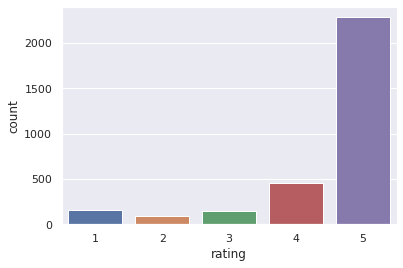

In [ ]:
ax = sns.countplot(x=data_rate['rating'],  data=data_rate)

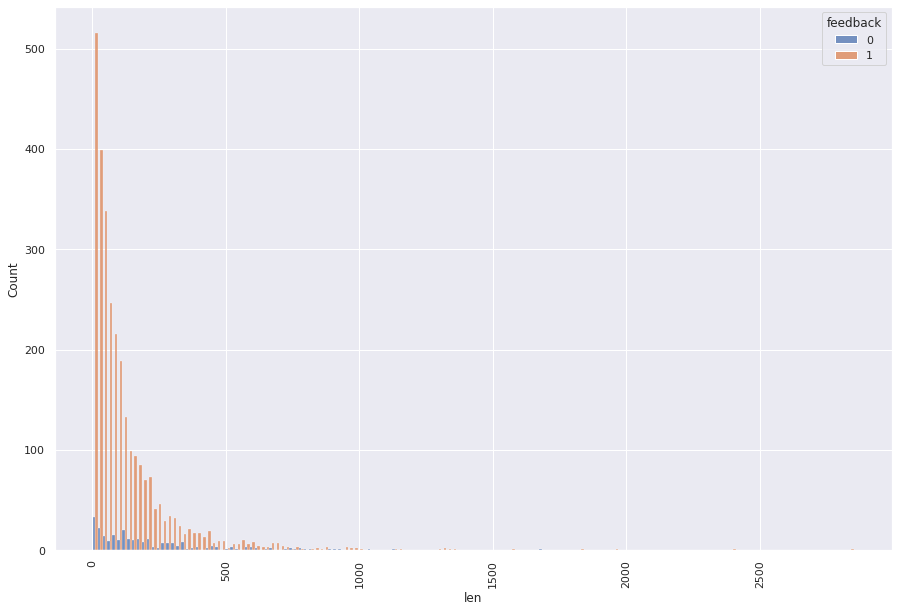

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data = data_rate, x = 'len', hue ='feedback',multiple="dodge", shrink = 1)
plt.xticks(Rotation = 90)
plt.show()

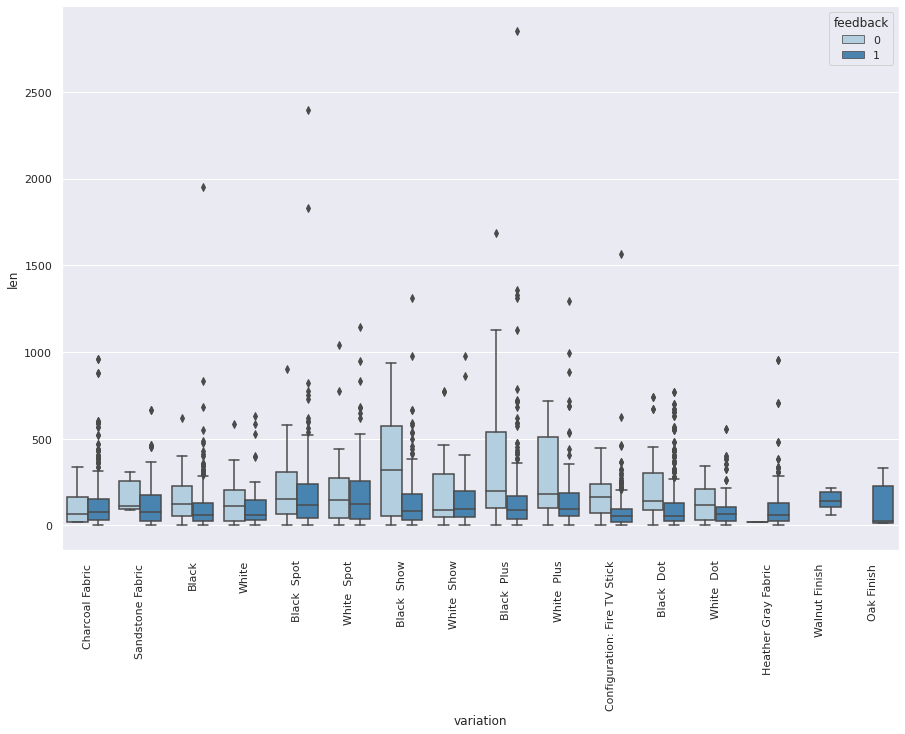

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot( x = 'variation', y = 'len', hue = 'feedback', data = data_rate, palette = "Blues")
plt.xticks(Rotation = 90)
plt.show()

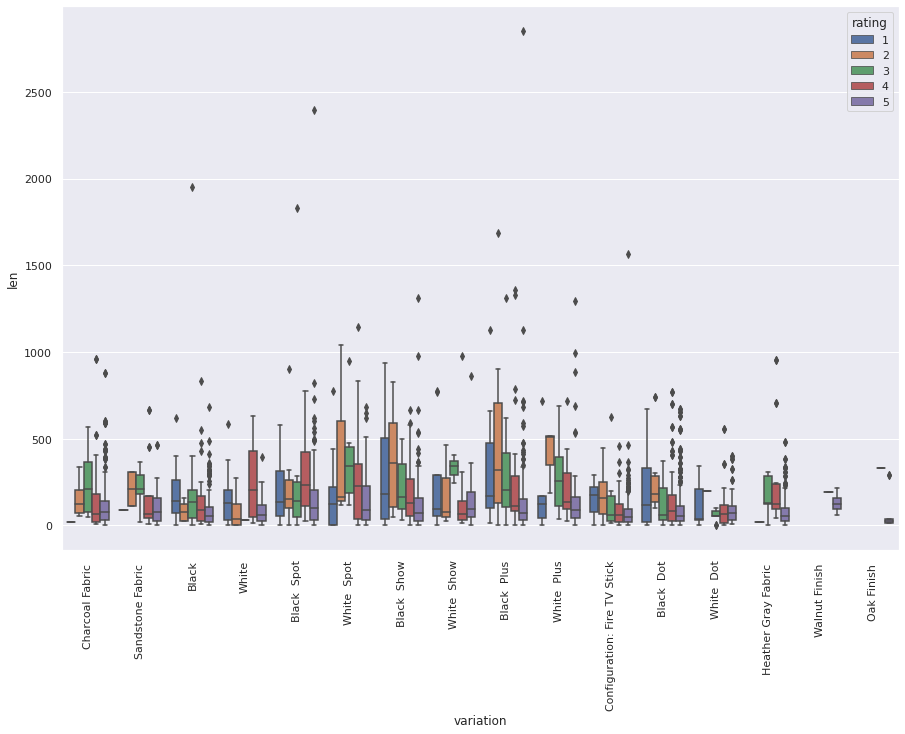

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot( x = 'variation', y = 'len', hue = 'rating', data = data_rate)
plt.xticks(Rotation = 90)
plt.show()

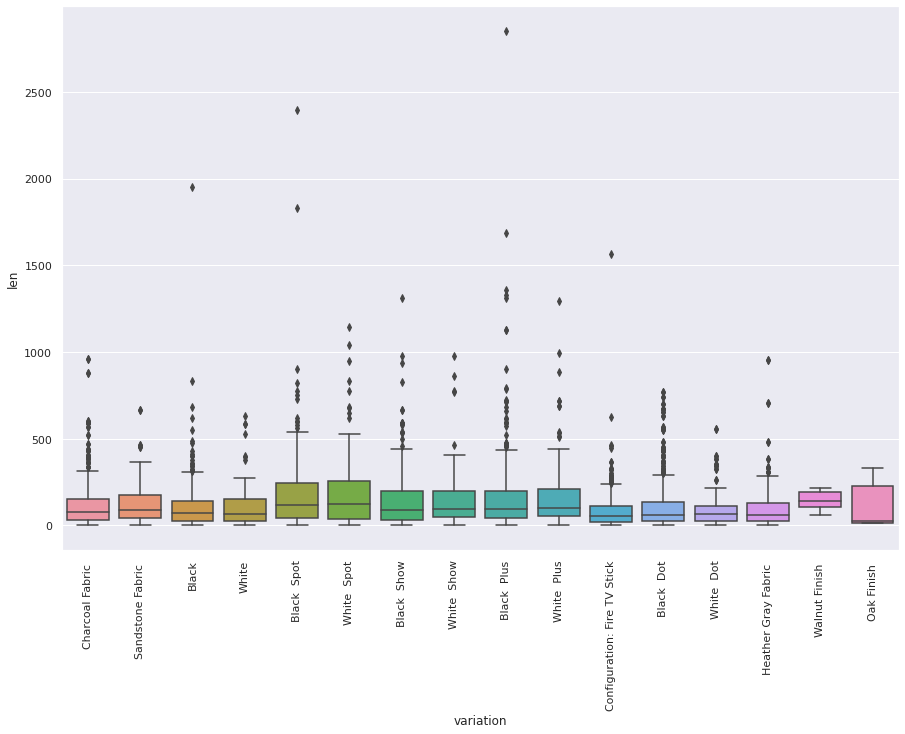

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot( x = 'variation', y = 'len', data = data_rate)
plt.xticks(Rotation = 90)
plt.show()

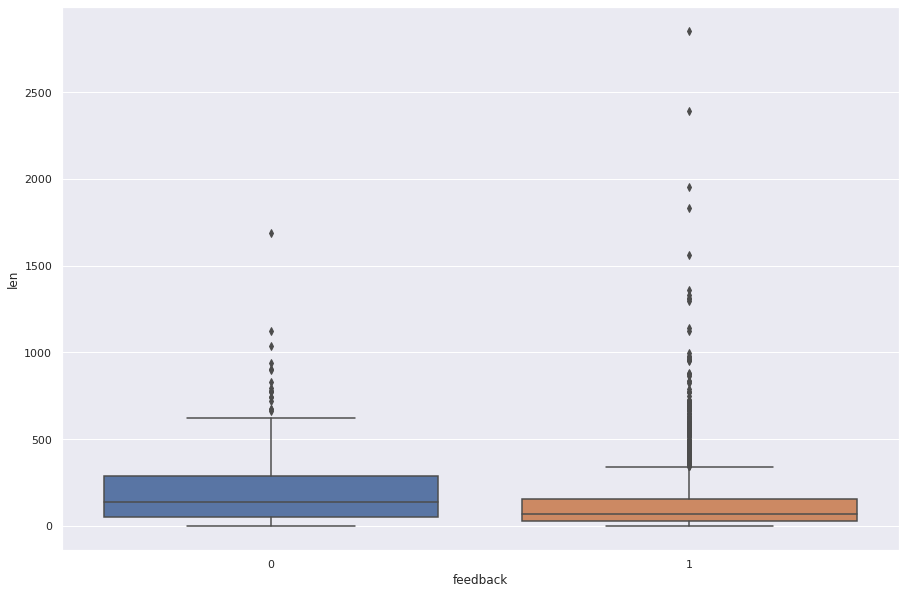

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot( x = 'feedback', y = 'len', data = data_rate)
plt.xticks(Rotation = 0)
plt.show()

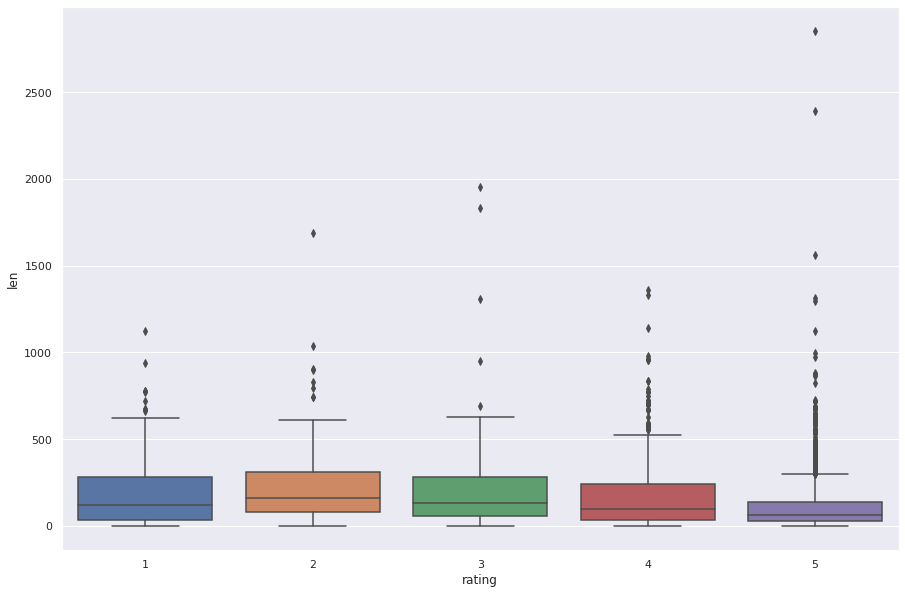

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot( x = 'rating', y = 'len', data = data_rate)
plt.xticks(Rotation = 0)
plt.show()

Bottom plot shows x-axis = word count in a review. Therefore, there re more low count reviews than high word.

# Now let's see word count based on rating

What I want to plot is for graph titled "rating = 1" rating = 2....., x axis = length, y axis: count

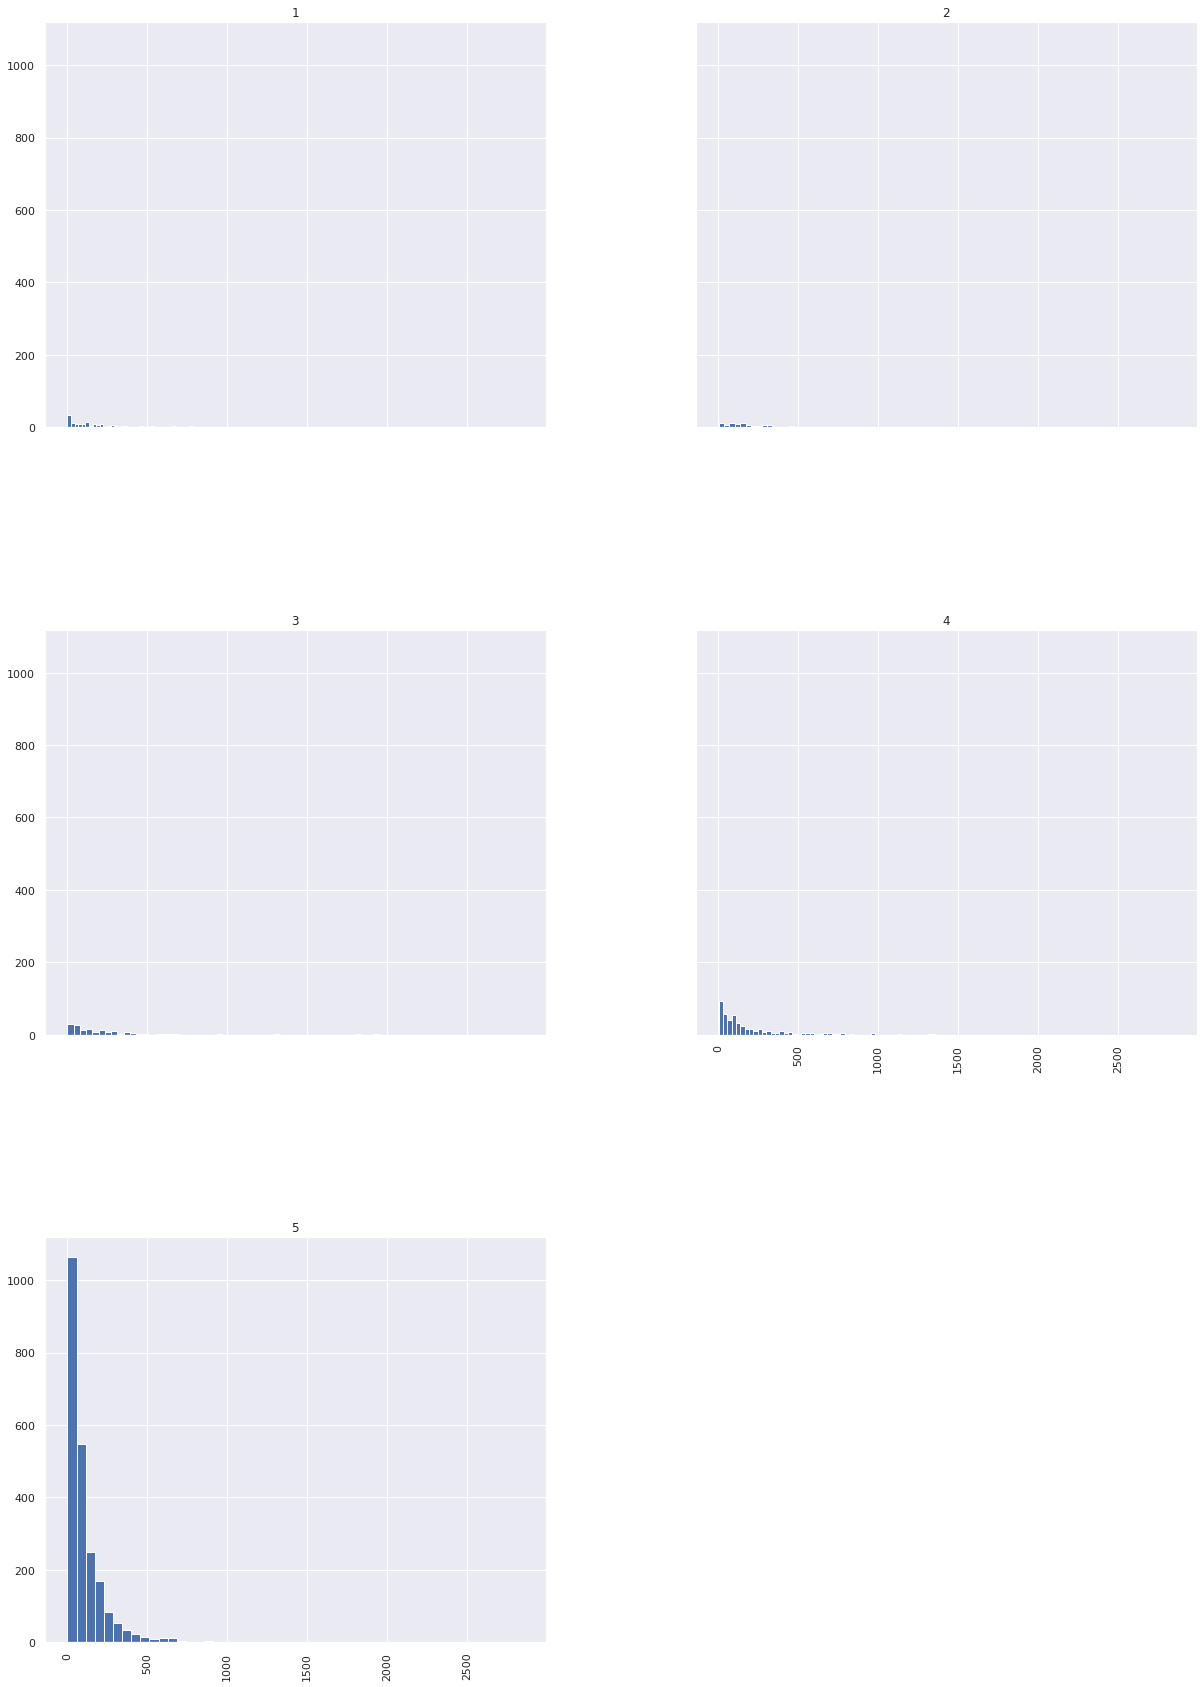

In [ ]:
data_rate.hist(column='len', by='rating', sharex = True, sharey = True, bins=50,figsize=(20  , 30))
plt.show()


##Pre-processing of data




In [ ]:
def noise_removal(s):
  #make into lower case
  s = s.lower()
  #remove html tags, punctuations
  s = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", s)  
  # remove numbers
  s = re.sub(r"\d+", "", s)
   
  return s

In [ ]:
data_rate['review_clean'] = data_rate['verified_reviews'].apply(noise_removal)

#remove stopwords
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
#iterate through the list of stop words
data_rate['review_clean'] = data_rate['review_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

data_rate[['verified_reviews','review_clean']].head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,verified_reviews,review_clean
141,Not much features.,much features
162,"Stopped working after 2 weeks ,didn't follow c...",stopped working weeks didnt follow commands re...
341,Alexa hardly came on..,alexa hardly came
350,Item no longer works after just 5 months of us...,item longer works months use connect wifi unre...
361,This thing barely works. You have to select 3r...,thing barely works select rd party apps stuff ...
368,I returned 2 Echo Dots & am only getting refun...,returned echo dots getting refund returned one...
369,not working,working
373,I'm an Echo fan but this one did not work,im echo fan one work
374,,
381,It worked for a month or so then it stopped. I...,worked month stopped ive tried everything try ...


In [ ]:
#tokeinzation
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_rate['review_token'] = data_rate['review_clean'].apply(lambda x: word_tokenize(x))
data_rate[['verified_reviews','review_clean','review_token']].head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,verified_reviews,review_clean,review_token
141,Not much features.,much features,"[much, features]"
162,"Stopped working after 2 weeks ,didn't follow c...",stopped working weeks didnt follow commands re...,"[stopped, working, weeks, didnt, follow, comma..."
341,Alexa hardly came on..,alexa hardly came,"[alexa, hardly, came]"
350,Item no longer works after just 5 months of us...,item longer works months use connect wifi unre...,"[item, longer, works, months, use, connect, wi..."
361,This thing barely works. You have to select 3r...,thing barely works select rd party apps stuff ...,"[thing, barely, works, select, rd, party, apps..."
368,I returned 2 Echo Dots & am only getting refun...,returned echo dots getting refund returned one...,"[returned, echo, dots, getting, refund, return..."
369,not working,working,[working]
373,I'm an Echo fan but this one did not work,im echo fan one work,"[im, echo, fan, one, work]"
374,,,[]
381,It worked for a month or so then it stopped. I...,worked month stopped ive tried everything try ...,"[worked, month, stopped, ive, tried, everythin..."


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
def word_lemmatizer(s):
    tokens = s
    new_string = []
    for word in tokens:
        lemma = lemmatizer.lemmatize(word, pos="v")
        # exclude if lenght of lemma is smaller than 2
        if len(lemma) > 2:
            new_string.append(lemma)
    
    s = ' '.join(new_string)
    return s.strip()


In [ ]:
nltk.download('wordnet')
# data_rate['review_lemma'] = data_rate['review_token'].apply(lambda x: word_lemmatizer(x))
data_rate['review_lemma'] = data_rate['review_token'].apply(word_lemmatizer)

data_rate[['verified_reviews','review_clean', 'review_token', 'review_lemma']].head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,verified_reviews,review_clean,review_token,review_lemma
141,Not much features.,much features,"[much, features]",much feature
162,"Stopped working after 2 weeks ,didn't follow c...",stopped working weeks didnt follow commands re...,"[stopped, working, weeks, didnt, follow, comma...",stop work weeks didnt follow command really fu...
341,Alexa hardly came on..,alexa hardly came,"[alexa, hardly, came]",alexa hardly come
350,Item no longer works after just 5 months of us...,item longer works months use connect wifi unre...,"[item, longer, works, months, use, connect, wi...",item longer work months use connect wifi unres...
361,This thing barely works. You have to select 3r...,thing barely works select rd party apps stuff ...,"[thing, barely, works, select, rd, party, apps...",thing barely work select party apps stuff youd...
368,I returned 2 Echo Dots & am only getting refun...,returned echo dots getting refund returned one...,"[returned, echo, dots, getting, refund, return...",return echo dot get refund return one package ...
369,not working,working,[working],work
373,I'm an Echo fan but this one did not work,im echo fan one work,"[im, echo, fan, one, work]",echo fan one work
374,,,[],
381,It worked for a month or so then it stopped. I...,worked month stopped ive tried everything try ...,"[worked, month, stopped, ive, tried, everythin...",work month stop ive try everything try make wo...


##Splitting into test set and training set

CREATING TRAINING SET AND TEST SET

In [ ]:
pos_train = data_rate[data_rate['feedback']==1][['review_lemma', 'feedback']].head(2025)
neg_train = data_rate[data_rate['feedback']==0][['review_lemma', 'feedback']].head(180)

pos_test = data_rate[data_rate['feedback']==1][['review_lemma', 'feedback']].tail(868)
neg_test = data_rate[data_rate['feedback']==0][['review_lemma', 'feedback']].tail(77)

In [ ]:

train_df = pd.concat([pos_train, neg_train]).sample(frac = 1).reset_index(drop=True)
test_df = pd.concat([pos_test, neg_test]).sample(frac = 1).reset_index(drop=True)

In [ ]:
train_df.head()

,review_lemma,feedback
0,excellent purchase echo plus sound quality goo...,1
1,love look good,1
2,love kitchen watch prime video cook,1
3,get good deal work great prime setup bite pain...,1
4,contact people india suppose charge hard under...,1


In [ ]:
test_df.head()

,review_lemma,feedback
0,use product music great,1
1,easy use nonstop music,1
2,great love,1
3,talk play type music want listen even turn ask,1
4,fire stick alexa happy first one love use many...,1


In [ ]:
X_train = train_df['review_lemma']
X_test  = test_df['review_lemma']
y_train = train_df['feedback']
y_test  = test_df['feedback']

## Creating Bag of Words


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#Creating instance of CountVectorizer
vectorizer = CountVectorizer(binary=True)
#creating vocabulary of words
vectorizer.fit(X_train)
#print((sorted(vectorizer.vocabulary_)))

#Vectorisation
X_train_onehot = vectorizer.transform(X_train)
X_test_onehot = vectorizer.transform(X_test)

#print shape post encoding 
print(X_train_onehot.shape)
print(X_test_onehot.shape)


(2205, 2913)
(945, 2913)


## Applying the classifier -Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=10000)
#fitting the values for x and y
logistic.fit(X_train_onehot,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predictions from test data
prediction = logistic.predict(X_test_onehot)

##Creating confusion matrix and calculating performance matrix

Text(89.18, 0.5, 'Predicted')

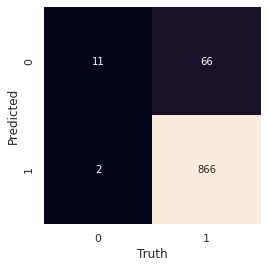

In [ ]:
###### confusion matrix  starts ######
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
matrix = confusion_matrix(y_test,prediction) 
names = np.unique(prediction)
sns.heatmap(matrix, square=True, annot=True, cbar=False,xticklabels=names, yticklabels=names ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

###### Confusion matrix ends ########

In [ ]:
#calculating the accuracy
accuracy_score = accuracy_score(y_test,prediction)
print("Accuracy of  Logistic Regression :",accuracy_score)

Accuracy of  Logistic Regression : 0.928042328042328


In [ ]:
#calculating the classification report
Report = classification_report(y_test,prediction, )
print(" ",Report)

                precision    recall  f1-score   support

           0       0.85      0.14      0.24        77
           1       0.93      1.00      0.96       868

    accuracy                           0.93       945
   macro avg       0.89      0.57      0.60       945
weighted avg       0.92      0.93      0.90       945



In [ ]:
#calculating the Precision
Precision_score = precision_score(y_test,prediction)
print("Precision of  Logistic Regression :",Precision_score)

Precision of  Logistic Regression : 0.9291845493562232


In [ ]:
#calculating the Recall
Recall_score = recall_score(y_test,prediction)
print("Recall of  Logistic Regression :",Recall_score)

Recall of  Logistic Regression : 0.9976958525345622


In [ ]:
#calculating the F1 score
F1_score = f1_score(y_test,prediction)
print("F1 Score of  Logistic Regression :",F1_score)

F1 Score of  Logistic Regression : 0.9622222222222223
